# **Not an ideal network**

# Program Name : Not an ideal Network- Updated Version
# Developed and updated by : EVA Admin & Nihar Kanungo
# Batch  : EVA Batch 2 Monday 
# Submitted Date : 29th July 2019
# Abstract 

This Program describes the "Not an Ideal Network" scenario. That means there must be some code that is not used in ideal conditions. Let's explore the codes line by line and find out the piece of code that makes it not ideal. Once we figure out the code we may try to fix it if possible . 

So let's go ahead and see the codes . For easy understanding of the code we have added comments to each/most of the lines .

==============================================================================================================

Keras  is a high level tensorflow API which is widely used for Deep Learning and Computer vision applications of Machine Learning 
The following lines of the code will install keras using pip and import keras and all it's functionalities to the notebook

===============================================================================================================

In [0]:
# Install Keras using pip 
# https://keras.io/
!pip install -q keras
# import keras library into the jupyter notebook
import keras

The following cell will import all necessary packages for runnning the algorithm to train the data 

In [0]:
# Importing numpy will inclide all the mathematical features ( matrix, vector etc..) to the program
import numpy as np

# importing the sequential API of keras to the notebook. The sequential API allows to create model layer by layer for most of the problems
from keras.models import Sequential
# Import Flatten which is required to convert the images into matrix format which can be trained using the Sequential API
from keras.layers import Flatten
# Import 2D convolution features
from keras.layers import Convolution2D
# Import the numpy utilities 
from keras.utils import np_utils
# Import the mnist dataset which is a corpus of all handwritten digits 
from keras.datasets import mnist

MNIST is a popular dataset which includes all the handwritten digits. MNIST typically comes with Train and Test Split. 

In [0]:
# Load the MNIST data into the variables defined in the program . X_train and X_test are the features where as y_train & y_test are the target variables  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


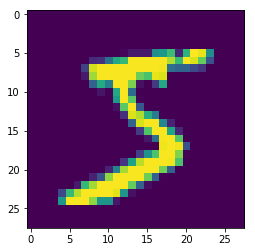

In [5]:
# The following line of code will print the shape of the training features in the cell of the notebook . 
print (X_train.shape)
#************************************************************************************************************************************** 
# Matplotlib is a very popular package used for data visualization primarily by plotting charts/graphs for Exploratory Data Analytics. 
# The visual representation provides a great amount of information to data analysts for future actions to be taken 
#************************************************************************************************************************************** 
from matplotlib import pyplot as plt
# This line of code will display the output inline without the user explicitely asking the code to plot the chart/graph
%matplotlib inline
# This line of code plot the data with index 0 ( the first one only)
plt.imshow(X_train[0])

In [0]:
# The following lines of code reshapes the training and testing features to 28 * 28 image size with single channel .
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# In Keras the data has to be converted into a specific format which is float 32 . The following lines of code converts the data format into Float32 .
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#*************************************************************************************************************************************************************************** 
# Normalization/Standardization is an important aspect of the data/features to ensure that the data points are in a specfic range . The following lines of code will divide 
# each data point in training and testing data by 255 to keep the number with in 0-1 .255 refers to the value of the colors .
#*************************************************************************************************************************************************************************** 
X_train /= 255
X_test /= 255

In [8]:
# The following line of code display the first 10 training levels .The levels here are the digits that are written
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# The converted target training values after modified as 10-dimensional class matrices. This process is also known as one hot encoding 
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

The Following lines of code are the heart of the model training . it includes
1. Import the Activation function ( Sigmoid, tanh,Relu etc.)
2. Import 2D Maxpooling which can be used in conjuction with the Convolution layer
3. Use multiple convolution functions on the input image
4. Add Flatten Layer
5. Add Softmax Activation to find out the Target with maximum proability 
6. Print the Model Summary
7. Compile the model using 

    a. adam optimizer ( Popular optimizer is SGD) 
    b. Loss function as categorical crossentropy
    c. Evaluation method as Accuracy of the prediction
    
8. Fit the training data using the complied model with the following hyper parameters

    a. Batch size of 32
    b. for 10 iterations for the training data 
    c. An animated progress bar for Verbose=1
    
9. Fit the model with the input data (X_train) against the target (Y_train)
10. Print the Model as trained 
11. Predict the test data using the model trained 
12. Print the prediction



In [0]:
# Print the import statements 
from keras.layers import Activation, MaxPooling2D
# define the keras sequential model which can train multiple layers 
model = Sequential() 

# Add a convolution layer with 32 kernels of size 3*3 on input image of size 28 * 28
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Input image - 28* 28*1 , Kernel size : 3 * 3 * 1  , No of kernels 32 , Output 26 * 26 * 32

# Add a convolution layer with 64 kernels of size 3*3 * 32 on input  of size 26 * 26 * 32
model.add(Convolution2D(64, 3, 3, activation='relu')) # Input image - 26* 26*32 , Kernel size : 3 * 3 * 32  , No of kernels 64 , Output 24 * 24 * 64

# Add a convolution layer with 128 kernels of size 3*3* 64 on input  of size 24 * 24 * 64
model.add(Convolution2D(128, 3, 3, activation='relu')) # Input image - 24* 24*64 , Kernel size : 3 * 3 * 64  , No of kernels 128 , Output 22 * 22 * 128

# Maxpooling layer of size 2*2 applied on the above output 
model.add(MaxPooling2D(pool_size=(2, 2))) # Input image - 22* 22*128 , Max pooling : 2 * 2   , Output 11 * 11 * 256

# Add a convolution layer with 256 kernels of size 3*3* 256 on input  of size 11 * 11 * 256
model.add(Convolution2D(256, 3, 3, activation='relu')) # Input image - 11* 11*256 , Kernel size : 3 * 3 * 256  , No of kernels 256 , Output 9 * 9 * 256

# Add a convolution layer with 512 kernels of size 3*3* 256 on input  of size 9 * 9 * 256
model.add(Convolution2D(512, 3, 3, activation='relu')) # Input image - 9* 9*256 , Kernel size : 3 * 3 * 256  , No of kernels 512 , Output 7 * 7 * 512

# Add a convolution layer with 1024 kernels of size 3*3* 512 on input  of size 7 * 7 * 512
model.add(Convolution2D(1024, 3, 3, activation='relu')) # Input image - 7* 7*512 , Kernel size : 3 * 3 * 512  , No of kernels 1024 , Output 5 * 5 * 1024

# Add a convolution layer with 2048 kernels of size 3*3* 1024 on input  of size 5 * 5* 1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))# Input image - 5* 5*1024 , Kernel size : 3 * 3 * 1024  , No of kernels 2048, Output 3 * 3 * 2048

# Add a convolution layer with 10 kernels (no of classes) of size 3*3* 2048 on input  of size 3 * 3* 2048
model.add(Convolution2D(10, 3, 3, activation='relu')) # Input image - 3* 3*2048 , Kernel size : 3 * 3 * 2048  , No of kernels 10 , Output 1 * 1 * 10

# flattens the matrix/tensor into one dimension
model.add(Flatten())
# Apply the Softmax activation on the output value to find out the class with maximum probability as the predicted class/digit to be specific 
model.add(Activation('softmax'))

# Display the model summary
model.summary()

W0727 18:17:07.452833 140247618705280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
W0727 18:17:07.506783 140247618705280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 18:17:07.514401 140247618705280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `C

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


In [0]:
# compile the model using the following hyper parameters
#    a. adam optimizer ( Popular optimizer is SGD) 
#    b. Loss function as categorical crossentropy
#    c. Evaluation method as Accuracy of the prediction
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0727 18:23:01.276613 140247618705280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 18:23:01.310328 140247618705280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# Fit the training data into the model for 10 epochs 

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0727 18:23:35.059998 140247618705280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0727 18:23:35.144067 140247618705280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 1.6094 - acc: 0.4157
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4407 - acc: 0.4817
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4290 - acc: 0.4850
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4286 - acc: 0.4849
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4261 - acc: 0.4853
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4197 - acc: 0.4873
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4174 - acc: 0.4873
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4251 - acc: 0.4857
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4192 - acc: 0.4872
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4278 - a

In [0]:
# Evaluate the test data using the model trained above and find out the score 
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# print the score of the model evaluation 
print(score)

[1.4311341636657715, 0.485]


In [0]:
# This line of code will predict the target of the test data using .predict if the model trained above
y_pred = model.predict(X_test)

In [0]:
# print the predicted target 
print(y_pred[:9])
# print the actual target
print(y_test[:9])
# This would help to understand how good/bad the model is in predicting the output . This is a good indication if the model needs to be reworked . 
# While accuracy depends on the domain and the degree of acceptability , a data scientist should always try to find parameters to increase the true positive prediction 

[[1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [3.5189401e-22 3.5189401e-22 1.0000000e+00 3.5189401e-22 3.5189401e-22
  3.5189401e-22 3.5189401e-22 3.5189401e-22 3.5189401e-22 3.5189401e-22]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [3.6690793e-25 3.6690793e-25 3.6690793e-25 3.6690793e-25 1.0000000e+00
  3.6690793e-25 3.6690793e-25 3.6690793e-25 3.6690793e-25 3.6690793e-25]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [6.8876398e-17 6.8876398e-17 6.8876398e-17 6.8876398e-17 1.0000000e+00
  6.8876398e-17 6.8876398e-17 6.8876398e-17 6.8876398e-17 

**Observation**
---------------------

1. The Training Time of this Model is very high due to 
      i) The Number of Kernels increases for each convolution layer 
      ii) The Total number of parameters increases a  lot for every convolution layer until the receptive
           field becomes the size of the image
2. The model seems to over train  as we are trying to find a lot of edges and gradients from images of 
     28 * 28 size
3. The Number of classes are 10 where as we are using a lot of kernels ( 32- 2048 ). That creates a lot of image in the memory and the processor becomes very slow due to excessive use of the memory
4. The Accuracy of the model is less as the model over trains itself 

**Major Problem Identified **

The Model directly lowers the number of kernels from 2048 to 10. This takes out all the major learnings that the model learned by performing multiple convolution operations. Hence the accuracy is very low 

**Fix**

It's important to preserve the understanding/learning by using a 1*  1 kernel and 10 of them. By doing this we will fit the features of all those 2048 channels into 10 and then perform a convolution of 3* 3 and 10 of them in order to map it to the number of output classes.

The following is the code which fixed the problem and got a better accuracy

---


      



In [12]:

from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
# This layer is added to preserve the learning for future steps.
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu')) 

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

y_pred = model.predict(X_test)

print(y_pred[:9])
print(y_test[:9])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

In [13]:
print(score)

[0.04412626036056208, 0.9905]


**Summary **

The following points to be considering while designing a Convolution model 

1. The Size of kernels and number of kernels for each convolution layer must be carefully decided 
2. The Number of kernels must be in line with the number of classes ( must not be less , must not be high)
3. The Hyper parameters must be choosen based on experience and learnings from multiple outcomes 
4. The Optimizer and Loss function must be choosen carefully and based on the data we are trying to fit 
5. Proper Normalization technique must be used

The Process of getting the best fit model is also iterative in nature and data hungry. Care must be taken to get a perfect fit model and not an overfit or underfit one 



*********************************************************************************************************************************